# Import Raw Data ✅

In [15]:
import pandas as pd

# Salary data
salary_19 = pd.read_excel("/Users/chris/Downloads/Data/2019-20_Salary.xlsx")
salary_20 = pd.read_excel("/Users/chris/Downloads/Data/2020-21_Salary.xlsx")

# Player performance data
basic_19 = pd.read_excel("/Users/chris/Downloads/Data/2019-20_Traditional.xlsx")
basic_20 = pd.read_excel("/Users/chris/Downloads/Data/2020-21_Traditional.xlsx")
advanced_19 = pd.read_excel("/Users/chris/Downloads/Data/2019-20_Advanced.xlsx")
advanced_20 = pd.read_excel("/Users/chris/Downloads/Data/2020-21_Advanced.xlsx")

# Rookies data
rookie_19 = pd.read_excel('/Users/chris/Downloads/Data/rookie19.xlsx')
rookie_20 = pd.read_excel('/Users/chris/Downloads/Data/rookie20.xlsx')

/Users/chris/opt/anaconda3/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:300: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/Users/chris/opt/anaconda3/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:300: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


# Data Cleaning
1. Strip unwanted characters in the Player column in both basic player stats dfs
2. Join salary data with basic stats data
3. Drop duplicates
4. Exclude rookies
5. Deal with NaN
6. Strip unwanted characters in the Salary column
7. Export

## Strip Unwanted Characters in Player Column ✅

In [16]:
# Data inspection of traditional player stats
basic_19.head() # strip characters following '\'

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Steven Adams\adamsst01,C,26,OKC,63,63,26.7,4.5,7.6,...,0.582,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9
1,2,Bam Adebayo\adebaba01,PF,22,MIA,72,72,33.6,6.1,11.0,...,0.691,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9
2,3,LaMarcus Aldridge\aldrila01,C,34,SAS,53,53,33.1,7.4,15.0,...,0.827,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9
3,4,Kyle Alexander\alexaky01,C,23,MIA,2,0,6.5,0.5,1.0,...,NaN,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0
4,5,Nickeil Alexander-Walker\alexani01,SG,21,NOP,47,1,12.6,2.1,5.7,...,0.676,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7


In [17]:
# Data inspection of traditional player stats
basic_20.head() # strip characters following '\'

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa\achiupr01,PF,21,MIA,61,4,12.1,2.0,3.7,...,0.509,1.2,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0
1,2,Jaylen Adams\adamsja01,PG,24,MIL,7,0,2.6,0.1,1.1,...,NaN,0.0,0.4,0.4,0.3,0.0,0.0,0.0,0.1,0.3
2,3,Steven Adams\adamsst01,C,27,NOP,58,58,27.7,3.3,5.3,...,0.444,3.7,5.2,8.9,1.9,0.9,0.7,1.3,1.9,7.6
3,4,Bam Adebayo\adebaba01,C,23,MIA,64,64,33.5,7.1,12.5,...,0.799,2.2,6.7,9.0,5.4,1.2,1.0,2.6,2.3,18.7
4,5,LaMarcus Aldridge\aldrila01,C,35,TOT,26,23,25.9,5.4,11.4,...,0.872,0.7,3.8,4.5,1.9,0.4,1.1,1.0,1.8,13.5


In [18]:
# Strip characters after '\' 
basic_19.Player = basic_19.Player.str.split('\\').str[0]

In [19]:
# Check 
basic_19.head() # done!

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Steven Adams,C,26,OKC,63,63,26.7,4.5,7.6,...,0.582,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9
1,2,Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,...,0.691,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9
2,3,LaMarcus Aldridge,C,34,SAS,53,53,33.1,7.4,15.0,...,0.827,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9
3,4,Kyle Alexander,C,23,MIA,2,0,6.5,0.5,1.0,...,NaN,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0
4,5,Nickeil Alexander-Walker,SG,21,NOP,47,1,12.6,2.1,5.7,...,0.676,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7


In [20]:
# Do the same for basic_20
basic_20.Player = basic_20.Player.str.split('\\').str[0]
# Check
basic_20.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF,21,MIA,61,4,12.1,2.0,3.7,...,0.509,1.2,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0
1,2,Jaylen Adams,PG,24,MIL,7,0,2.6,0.1,1.1,...,NaN,0.0,0.4,0.4,0.3,0.0,0.0,0.0,0.1,0.3
2,3,Steven Adams,C,27,NOP,58,58,27.7,3.3,5.3,...,0.444,3.7,5.2,8.9,1.9,0.9,0.7,1.3,1.9,7.6
3,4,Bam Adebayo,C,23,MIA,64,64,33.5,7.1,12.5,...,0.799,2.2,6.7,9.0,5.4,1.2,1.0,2.6,2.3,18.7
4,5,LaMarcus Aldridge,C,35,TOT,26,23,25.9,5.4,11.4,...,0.872,0.7,3.8,4.5,1.9,0.4,1.1,1.0,1.8,13.5


In [ ]:
# Strip characters after '\' inclusive in the 'Player' column
advanced_19.Player = advanced_19.Player.str.split('\\').str[0]
advanced_20.Player = advanced_20.Player.str.split('\\').str[0]

## Join Salary Data with Traditional Player Stats ✅

In [21]:
# Data inspection
salary_19.head()

,Rk,Player,Salary,Year
0,1,Stephen Curry,"$40,231,758",2019/20
1,2,Chris Paul,"$38,506,482",2019/20
2,2,Russell Westbrook,"$38,506,482",2019/20
3,4,John Wall,"$38,199,000",2019/20
4,4,James Harden,"$38,199,000",2019/20


In [22]:
# Join salary dfs with traditional stats dfs
# 1. Join 19 basic stats with 19 salary
basic_stats_19 = pd.merge(basic_19, salary_19, on=['Player'])
basic_stats_19

,Rk_x,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,TRB,AST,STL,BLK,TOV,PF,PTS,Rk_y,Salary,Year
0,1,Steven Adams,C,26,OKC,63,63,26.7,4.5,7.6,...,9.3,2.3,0.8,1.1,1.5,1.9,10.9,41,"$25,842,697",NaN
1,2,Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,...,10.2,5.1,1.1,1.3,2.8,2.5,15.9,234,"$3,454,080",NaN
2,3,LaMarcus Aldridge,C,34,SAS,53,53,33.1,7.4,15.0,...,7.4,2.4,0.7,1.6,1.4,2.4,18.9,40,"$26,000,000",NaN
3,4,Kyle Alexander,C,23,MIA,2,0,6.5,0.5,1.0,...,1.5,0.0,0.0,0.0,0.5,0.5,1.0,462,"$79,568",NaN
4,5,Nickeil Alexander-Walker,SG,21,NOP,47,1,12.6,2.1,5.7,...,1.8,1.9,0.4,0.2,1.1,1.2,5.7,246,"$2,964,840",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,524,Thaddeus Young,PF,31,CHI,64,16,24.9,4.2,9.4,...,4.9,1.8,1.4,0.4,1.6,2.1,10.3,91,"$12,900,000",NaN
548,525,Trae Young,PG,21,ATL,60,60,35.3,9.1,20.8,...,4.3,9.3,1.1,0.1,4.8,1.7,29.6,169,"$6,273,000",NaN
549,526,Cody Zeller,C,27,CHO,58,39,23.1,4.3,8.3,...,7.1,1.5,0.7,0.4,1.3,2.4,11.1,83,"$14,471,910",NaN
550,527,Tyler Zeller,C,30,SAS,2,0,2.0,0.5,2.0,...,2.0,0.0,0.0,0.0,0.0,0.0,1.0,440,"$245,686",NaN


In [23]:
# Remove redundant 'Rk' and the 'Year' columns
basic_stats_19.drop(['Rk_x','Rk_y','Year'], axis=1, inplace=True)

In [24]:
# Check if salary match
basic_stats_19.head() # yes!

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary
0,Steven Adams,C,26,OKC,63,63,26.7,4.5,7.6,0.592,...,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9,"$25,842,697"
1,Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,0.557,...,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9,"$3,454,080"
2,LaMarcus Aldridge,C,34,SAS,53,53,33.1,7.4,15.0,0.493,...,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9,"$26,000,000"
3,Kyle Alexander,C,23,MIA,2,0,6.5,0.5,1.0,0.500,...,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0,"$79,568"
4,Nickeil Alexander-Walker,SG,21,NOP,47,1,12.6,2.1,5.7,0.368,...,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7,"$2,964,840"


In [25]:
# 2. Do the same for 20
basic_stats_20 = pd.merge(basic_20, salary_20, on=['Player'])
basic_stats_20.tail()

,Rk_x,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Rk_y,Salary
611,536,Delon Wright,PG,28,SAC,27,8,25.8,3.9,8.3,...,2.9,3.9,3.6,1.6,0.4,1.3,1.1,10.0,140,"$9,000,000"
612,537,Thaddeus Young,PF,32,CHI,68,23,24.3,5.4,9.7,...,3.8,6.2,4.3,1.1,0.6,2.0,2.2,12.1,86,"$13,545,000"
613,538,Trae Young,PG,22,ATL,63,63,33.7,7.7,17.7,...,3.3,3.9,9.4,0.8,0.2,4.1,1.8,25.3,175,"$6,571,800"
614,539,Cody Zeller,C,28,CHO,48,21,20.9,3.8,6.8,...,4.4,6.8,1.8,0.6,0.4,1.1,2.5,9.4,76,"$15,415,730"
615,540,Ivica Zubac,C,23,LAC,72,33,22.3,3.6,5.5,...,4.6,7.2,1.3,0.3,0.9,1.1,2.6,9.0,168,"$7,000,000"


In [26]:
# Remove the 'Rk' columns
basic_stats_20.drop(['Rk_x','Rk_y'], axis=1, inplace=True)

In [30]:
# 3. Append 20 to 19
df_before_dup = pd.concat([basic_stats_19, basic_stats_20], ignore_index=True)
df_before_dup

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary
0,Steven Adams,C,26,OKC,63,63,26.7,4.5,7.6,0.592,...,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9,"$25,842,697"
1,Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,0.557,...,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9,"$3,454,080"
2,LaMarcus Aldridge,C,34,SAS,53,53,33.1,7.4,15.0,0.493,...,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9,"$26,000,000"
3,Kyle Alexander,C,23,MIA,2,0,6.5,0.5,1.0,0.500,...,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0,"$79,568"
4,Nickeil Alexander-Walker,SG,21,NOP,47,1,12.6,2.1,5.7,0.368,...,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7,"$2,964,840"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,Delon Wright,PG,28,SAC,27,8,25.8,3.9,8.3,0.462,...,1.0,2.9,3.9,3.6,1.6,0.4,1.3,1.1,10.0,"$9,000,000"
1164,Thaddeus Young,PF,32,CHI,68,23,24.3,5.4,9.7,0.559,...,2.5,3.8,6.2,4.3,1.1,0.6,2.0,2.2,12.1,"$13,545,000"
1165,Trae Young,PG,22,ATL,63,63,33.7,7.7,17.7,0.438,...,0.6,3.3,3.9,9.4,0.8,0.2,4.1,1.8,25.3,"$6,571,800"
1166,Cody Zeller,C,28,CHO,48,21,20.9,3.8,6.8,0.559,...,2.5,4.4,6.8,1.8,0.6,0.4,1.1,2.5,9.4,"$15,415,730"


In [55]:
# 1. Join basic stats with advanced stats on Player name
stats_19 = pd.merge(basic_19, advanced_19, on='Player')

# 2. Do the same for 20
advanced_20.drop(['Pos','Age','Tm','G','MP'], axis=1, inplace=True)
stats_20 = pd.merge(basic_20, advanced_20, on='Player')

In [56]:
stats_19

,Rk_x,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,1,Steven Adams,C,26,OKC,63,63,26.7,4.5,7.6,...,14.2,17.3,3.8,2.7,6.5,0.185,1.9,1.1,2.9,2.1
1,2,Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,...,17.6,21.2,4.6,3.9,8.5,0.168,1.4,2.0,3.4,3.3
2,3,LaMarcus Aldridge,C,34,SAS,53,53,33.1,7.4,15.0,...,7.8,23.4,3.0,1.4,4.5,0.122,1.8,-0.5,1.4,1.5
3,4,Kyle Alexander,C,23,MIA,2,0,6.5,0.5,1.0,...,33.3,10.2,0.0,0.0,0.0,-0.003,-6.1,-3.5,-9.6,0.0
4,5,Nickeil Alexander-Walker,SG,21,NOP,47,1,12.6,2.1,5.7,...,16.1,23.3,-0.7,0.4,-0.2,-0.020,-3.2,-1.4,-4.6,-0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,525,Trae Young,PG,21,ATL,60,60,35.3,9.1,20.8,...,16.2,34.9,5.3,0.6,5.9,0.133,6.2,-2.3,3.9,3.1
1019,526,Cody Zeller,C,27,CHO,58,39,23.1,4.3,8.3,...,11.9,20.8,2.3,1.3,3.6,0.129,0.2,-0.8,-0.6,0.5
1020,527,Tyler Zeller,C,30,SAS,2,0,2.0,0.5,2.0,...,0.0,43.2,0.0,0.0,0.0,-0.075,-0.3,-22.1,-22.4,0.0
1021,528,Ante Žižić,C,23,CLE,22,0,10.0,1.9,3.3,...,11.1,17.5,0.3,0.2,0.5,0.106,-1.7,-1.5,-3.2,-0.1


In [58]:
stats_20

,Rk_x,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,1,Precious Achiuwa,PF,21,MIA,61,4,12.1,2.0,3.7,...,13.5,19.5,0.3,1.0,1.3,0.085,-3.5,-0.9,-4.5,-0.5
1,2,Jaylen Adams,PG,24,MIL,7,0,2.6,0.1,1.1,...,0.0,18.6,-0.1,0.0,-0.1,-0.252,-14.9,-5.0,-19.8,-0.1
2,3,Steven Adams,C,27,NOP,58,58,27.7,3.3,5.3,...,17.5,11.7,2.3,1.7,4.0,0.119,-0.3,-0.5,-0.8,0.5
3,4,Bam Adebayo,C,23,MIA,64,64,33.5,7.1,12.5,...,15.0,23.7,5.6,3.2,8.8,0.197,2.9,1.9,4.7,3.6
4,5,LaMarcus Aldridge,C,35,TOT,26,23,25.9,5.4,11.4,...,7.9,22.2,0.5,0.6,1.1,0.080,-0.2,-0.4,-0.6,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1216,536,Delon Wright,PG,28,SAC,27,8,25.8,3.9,8.3,...,12.7,17.1,0.8,0.5,1.3,0.092,0.2,0.6,0.8,0.5
1217,537,Thaddeus Young,PF,32,CHI,68,23,24.3,5.4,9.7,...,16.1,22.3,2.8,2.2,5.1,0.147,2.0,1.2,3.2,2.2
1218,538,Trae Young,PG,22,ATL,63,63,33.7,7.7,17.7,...,16.2,33.0,5.9,1.3,7.2,0.163,5.4,-1.7,3.6,3.0
1219,539,Cody Zeller,C,28,CHO,48,21,20.9,3.8,6.8,...,11.9,18.3,2.1,1.1,3.3,0.156,-0.2,-0.1,-0.3,0.4


In [59]:
# Remove the 'Rk' columns
stats_20.drop(['Rk_x','Rk_y'], axis=1, inplace=True)
stats_19.drop(['Rk_x','Rk_y'], axis=1, inplace=True)

In [63]:
# 3. Join player stats with salary
df_19 = pd.merge(stats_19, salary_19, on='Player')
df_20 = pd.merge(stats_20, salary_20, on='Player')

In [64]:
# 4. Append 20 to 19
df = pd.concat([df_19, df_20], ignore_index=True)
df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Rk,Salary
0,Steven Adams,C,26,OKC,63,63,26.7,4.5,7.6,0.592,...,3.8,2.7,6.5,0.185,1.9,1.1,2.9,2.1,41,"$25,842,697"
1,Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,0.557,...,4.6,3.9,8.5,0.168,1.4,2.0,3.4,3.3,234,"$3,454,080"
2,LaMarcus Aldridge,C,34,SAS,53,53,33.1,7.4,15.0,0.493,...,3.0,1.4,4.5,0.122,1.8,-0.5,1.4,1.5,40,"$26,000,000"
3,Kyle Alexander,C,23,MIA,2,0,6.5,0.5,1.0,0.500,...,0.0,0.0,0.0,-0.003,-6.1,-3.5,-9.6,0.0,462,"$79,568"
4,Nickeil Alexander-Walker,SG,21,NOP,47,1,12.6,2.1,5.7,0.368,...,-0.7,0.4,-0.2,-0.020,-3.2,-1.4,-4.6,-0.4,246,"$2,964,840"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1937,Delon Wright,PG,28,SAC,27,8,25.8,3.9,8.3,0.462,...,0.8,0.5,1.3,0.092,0.2,0.6,0.8,0.5,140,"$9,000,000"
1938,Thaddeus Young,PF,32,CHI,68,23,24.3,5.4,9.7,0.559,...,2.8,2.2,5.1,0.147,2.0,1.2,3.2,2.2,86,"$13,545,000"
1939,Trae Young,PG,22,ATL,63,63,33.7,7.7,17.7,0.438,...,5.9,1.3,7.2,0.163,5.4,-1.7,3.6,3.0,175,"$6,571,800"
1940,Cody Zeller,C,28,CHO,48,21,20.9,3.8,6.8,0.559,...,2.1,1.1,3.3,0.156,-0.2,-0.1,-0.3,0.4,76,"$15,415,730"


## Drop Duplicated Rows ✅

I can't use this method because there are players switching team between the two seasons and earn different amount of salary. For players switching teams during a regular season, their performance is the average performance of the individual performance of both previous and current team.

In [15]:
# Drop duplicated rows
# df_baseline = df_baseline.drop_duplicates(subset='Player',keep='first',ignore_index=True)

## Exclude Rookies ✅

In [28]:
# Strip unnecessary characters after '\'
rookie_19.Player = rookie_19.Player.str.split('\\').str[0]

In [29]:
# A function to check rookies' player name
def conform_rows(df_reference, df):
    to_drop = [r for r in df.Player.tolist() if r in df_reference.Player.tolist()]
    print(to_drop)
    #df = df.drop(to_drop, axis=0)
    #return df

In [31]:
conform_rows(rookie_19, df_before_dup)

['Kyle Alexander', 'Nickeil Alexander-Walker', 'RJ Barrett', 'Darius Bazley', 'Goga Bitadze', 'Bol Bol', 'Jordan Bone', 'Brian Bowen', 'Ky Bowman', 'Jarrell Brantley', 'Ignas Brazdeikis', 'Oshae Brissett', 'Charlie Brown', 'Moses Brown', 'Devontae Cacok', 'Zylan Cheatham', 'Brandon Clarke', 'Nicolas Claxton', 'Chris Clemons', 'Amir Coffey', 'Tyler Cook', 'Tyler Cook', 'Tyler Cook', 'Jarrett Culver', 'Terence Davis', 'Luguentz Dort', 'Sekou Doumbouya', 'Carsen Edwards', 'Tacko Fall', 'Bruno Fernando', 'Michael Frazier', 'Wenyen Gabriel', 'Wenyen Gabriel', 'Wenyen Gabriel', 'Daniel Gafford', 'Darius Garland', 'Javonte Green', 'Marko Guduric', 'Kyle Guy', 'Rui Hachimura', 'Donta Hall', 'Donta Hall', 'Donta Hall', 'Jared Harper', 'Jaxson Hayes', 'Dewan Hernandez', 'Tyler Herro', 'Kevin Hervey', 'Jaylen Hoard', 'Talen Horton-Tucker', 'William Howard', "De'Andre Hunter", 'Justin James', 'DaQuan Jeffries', 'Ty Jerome', 'Cameron Johnson', 'Keldon Johnson', 'Mfiondu Kabengele', 'Louis King', 'J

In [32]:
# Strip unnecessary characters after '\'
rookie_20.Player = rookie_20.Player.str.split('\\').str[0]

In [33]:
conform_rows(rookie_20, df_before_dup)

['Precious Achiuwa', 'Ty-Shon Alexander', 'Cole Anthony', 'Deni Avdija', 'Udoka Azubuike', 'LaMelo Ball', 'Desmond Bane', 'Saddiq Bey', 'Tyler Bey', 'Keljin Blevins', 'Amida Brimah', 'Armoni Brooks', 'Elijah Bryant', 'Facundo Campazzo', 'Devin Cannady', 'Nate Darling', 'Gabriel Deck', 'Mamadi Diakite', 'Devon Dotson', 'Anthony Edwards', 'CJ Elleby', 'Malik Fitts', 'Malachi Flynn', 'Trent Forrest', 'Robert Franks', 'Anthony Gill', 'Freddie Gillespie', 'Josh Green', 'Ashton Hagans', 'Tyrese Haliburton', 'Josh Hall', 'Jalen Harris', 'Killian Hayes', 'Nate Hinton', 'Markus Howard', 'Elijah Hughes', 'Isaiah Joe', 'Mason Jones', 'Mason Jones', 'Mason Jones', 'Tre Jones', 'Nathan Knight', 'Anthony Lamb', 'Saben Lee', 'Will Magnay', 'Nico Mannion', 'Naji Marshall', 'Dakota Mathias', 'Tyrese Maxey', 'Skylar Mays', 'Jaden McDaniels', 'Sean McDermott', 'Sam Merrill', 'Aaron Nesmith', 'Zeke Nnaji', 'Jordan Nwora', 'Chuma Okeke', 'Onyeka Okongwu', 'Isaac Okoro', 'Cameron Oliver', 'Daniel Oturu', 'R

## Strip Unwanted Characters in Salary Column ✅

In [89]:
df_after_rookie.Salary = df_after_rookie.Salary.str.replace('$','') # remove dollar sign
df_after_rookie.Salary = df_after_rookie.Salary.str.replace(',','') # remove dollar sign

<ipython-input-89-d214ff47e434>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_baseline.Salary = df_baseline.Salary.str.replace('$','') # remove dollar sign


## Export

In [92]:
df_after_rookie.to_excel('df_ml.xlsx') # done!

# Feature Selection

In [43]:
df = pd.read_excel('/Users/chris/Downloads/Data/df_ml.xlsx')
df = df.drop('Rk',1)
df['Position'] = pd.factorize(df['Pos'])[0]
X = df.drop(['Salary','Player','Tm','Pos'],1)
y = df['Salary']

In [44]:
df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Salary,Position
0,Aaron Gordon,PF,24,ORL,62,62,32.5,5.4,12.4,0.437,...,1.4,2.3,3.7,0.087,-0.1,0.1,0.0,1.0,19863636,0
1,Aaron Gordon,PF,25,TOT,50,50,27.7,4.6,10.0,0.463,...,0.7,1.2,1.9,0.066,0.2,-0.2,0.0,0.7,18136364,0
2,Aaron Holiday,PG,23,IND,66,33,24.5,3.5,8.5,0.414,...,0.4,1.7,2.1,0.063,-1.6,0.0,-1.6,0.2,2239200,1
3,Aaron Holiday,PG,24,IND,66,8,17.8,2.6,6.6,0.390,...,-0.6,0.8,0.2,0.009,-3.2,-1.0,-4.1,-0.6,2345640,1
4,Abdel Nader,SF,26,OKC,55,6,15.8,2.2,4.8,0.468,...,0.5,0.9,1.3,0.074,-1.1,0.2,-1.0,0.2,1618520,2


In [45]:
X.head()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Position
0,24,62,62,32.5,5.4,12.4,0.437,1.2,3.8,0.308,...,20.7,1.4,2.3,3.7,0.087,-0.1,0.1,0.0,1.0,0
1,25,50,50,27.7,4.6,10.0,0.463,1.2,3.5,0.335,...,20.7,0.7,1.2,1.9,0.066,0.2,-0.2,0.0,0.7,0
2,23,66,33,24.5,3.5,8.5,0.414,1.3,3.3,0.394,...,18.7,0.4,1.7,2.1,0.063,-1.6,0.0,-1.6,0.2,1
3,24,66,8,17.8,2.6,6.6,0.390,1.0,2.8,0.368,...,19.5,-0.6,0.8,0.2,0.009,-3.2,-1.0,-4.1,-0.6,1
4,26,55,6,15.8,2.2,4.8,0.468,0.9,2.3,0.375,...,17.0,0.5,0.9,1.3,0.074,-1.1,0.2,-1.0,0.2,2


In [46]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 47 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       614 non-null    int64  
 1   G         614 non-null    int64  
 2   GS        614 non-null    int64  
 3   MP        614 non-null    float64
 4   FG        614 non-null    float64
 5   FGA       614 non-null    float64
 6   FG%       614 non-null    float64
 7   3P        614 non-null    float64
 8   3PA       614 non-null    float64
 9   3P%       614 non-null    float64
 10  2P        614 non-null    float64
 11  2PA       614 non-null    float64
 12  2P%       614 non-null    float64
 13  eFG%      614 non-null    float64
 14  FT        614 non-null    float64
 15  FTA       614 non-null    float64
 16  FT%       614 non-null    float64
 17  ORB       614 non-null    float64
 18  DRB       614 non-null    float64
 19  TRB       614 non-null    float64
 20  AST       614 non-null    float6

In [47]:
y.head()

0    19863636
1    18136364
2     2239200
3     2345640
4     1618520
Name: Salary, dtype: int64

## Pearson Correlation ✅

In [49]:
feature_name = list(X.columns)
# no of maximum features we need to select
num_feats=20

In [50]:
def cor_selector(X, y, num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
cor_support, cor_feature = cor_selector(X, y, num_feats)
print(str(len(cor_feature)), 'selected features')

20 selected features


In [5]:
cor_feature

['AST%',
 'OWS',
 'PER',
 'BPM',
 'GS',
 'WS',
 'DRB',
 'USG%',
 'OBPM',
 '2P',
 'VORP',
 'MP',
 '2PA',
 'AST',
 'FTA',
 'FT',
 'TOV',
 'FG',
 'FGA',
 'PTS']

## Chi-squared Selection ✅

In [6]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=num_feats)
chi_selector.fit(X_norm, y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

20 selected features


In [7]:
chi_feature

['GS',
 'MP',
 'FG',
 'FGA',
 '3P',
 '3PA',
 '2P',
 '2PA',
 'FT',
 'FTA',
 'ORB',
 'AST',
 'TOV',
 'PTS',
 'ORB%',
 'AST%',
 'BLK%',
 'DWS',
 'WS',
 'Position']

## Recursive Feature Elimination ✅

In [9]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_feats, step=10, verbose=5)
rfe_selector.fit(X_norm, y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')


Fitting estimator with 47 features.


/Users/chris/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 37 features.
Fitting estimator with 27 features.
20 selected features


In [10]:
rfe_feature

['Age',
 'G',
 'GS',
 'MP',
 'FG',
 'FGA',
 '3PA',
 '2P',
 '2PA',
 'FT%',
 'STL',
 'PF',
 'PTS',
 '3PAr',
 'ORB%',
 'AST%',
 'BLK%',
 'USG%',
 'DWS',
 'Position']

## LASSO Regression ✅

In [11]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l1", dual=False, solver='liblinear'), max_features=num_feats)
embeded_lr_selector.fit(X_norm, y)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

embeded_lr_feature

20 selected features


['Age',
 'G',
 'GS',
 'MP',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'eFG%',
 'FT',
 'FT%',
 'ORB',
 'AST',
 'BLK',
 'PTS',
 'PER',
 'TS%',
 '3PAr',
 'USG%',
 'OBPM']

## Tree-based Method ✅

In [12]:
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier

lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

embeded_lgb_selector = SelectFromModel(lgbc, max_features=num_feats)
embeded_lgb_selector.fit(X, y)

embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')


20 selected features


In [13]:
embeded_lgb_feature

['Age',
 'G',
 'GS',
 'MP',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'eFG%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB']

In [14]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=num_feats)
embeded_rf_selector.fit(X, y)

SelectFromModel(estimator=RandomForestClassifier(), max_features=20)

In [15]:
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

20 selected features


In [16]:
embeded_rf_feature

['Age',
 'G',
 'GS',
 'MP',
 'FGA',
 'FG%',
 '3P%',
 '2P%',
 'FT%',
 'TRB',
 'AST',
 'PTS',
 '3PAr',
 'FTr',
 'DRB%',
 'AST%',
 'BLK%',
 'TOV%',
 'USG%',
 'DBPM']

## Combination & Comparisons of All Methods ✅

In [17]:
# put all selection together
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'Chi-2':chi_support, 'RFE':rfe_support, 'Logistics':embeded_lr_support,
                                    'Random Forest':embeded_rf_support, 'LightGBM':embeded_lgb_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 20
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df#.head(num_feats)

,Feature,Pearson,Chi-2,RFE,Logistics,Random Forest,LightGBM,Total
1,MP,True,True,True,True,True,True,6
2,GS,True,True,True,True,True,True,6
3,PTS,True,True,True,True,True,False,5
4,FGA,True,True,True,False,True,True,5
5,2PA,True,True,True,True,False,True,5
6,2P,True,True,True,True,False,True,5
7,USG%,True,False,True,True,True,False,4
8,G,False,False,True,True,True,True,4
9,FT%,False,False,True,True,True,True,4
10,FT,True,True,False,True,False,True,4


# Multicollinearity

In [51]:
import pandas as pd 
df_multi = pd.read_excel('/Users/chris/Downloads/Data/df_ml.xlsx')

In [52]:
df_multi.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Rk,Salary
0,Aaron Gordon,PF,24,ORL,62,62,32.5,5.4,12.4,0.437,...,1.4,2.3,3.7,0.087,-0.1,0.1,0.0,1.0,53,19863636
1,Aaron Gordon,PF,25,TOT,50,50,27.7,4.6,10.0,0.463,...,0.7,1.2,1.9,0.066,0.2,-0.2,0.0,0.7,60,18136364
2,Aaron Holiday,PG,23,IND,66,33,24.5,3.5,8.5,0.414,...,0.4,1.7,2.1,0.063,-1.6,0.0,-1.6,0.2,296,2239200
3,Aaron Holiday,PG,24,IND,66,8,17.8,2.6,6.6,0.390,...,-0.6,0.8,0.2,0.009,-3.2,-1.0,-4.1,-0.6,319,2345640
4,Abdel Nader,SF,26,OKC,55,6,15.8,2.2,4.8,0.468,...,0.5,0.9,1.3,0.074,-1.1,0.2,-1.0,0.2,345,1618520


In [53]:
# include y and the 21 features only
df_multi = df_multi[['MP','GS','PTS','FGA','2PA','2P','USG%','G','FT%','FT','FG','Age','AST%','AST',
        'ORB','FTA','BLK%','3PAr','3PA','3P%','2P%','Salary']]

## Correlation Heatmap ✅

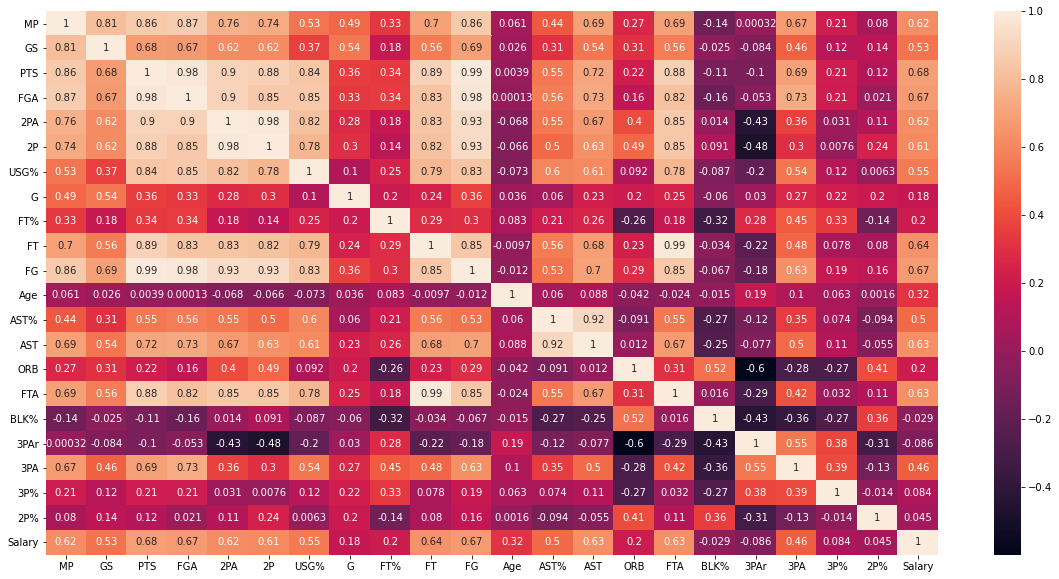

In [55]:
# sns correlation heatmap
# define correlation table
corrMatrix = df_multi.corr() # no boolean or convert it into numeric first

# plot
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,10))
#sns.set(font_scale=1.4)
corr_heatmap = sns.heatmap(corrMatrix, annot_kws={"size": 10}, annot=True)

In [57]:
corr_heatmap.figure.savefig('corr_heatmap.png')

In [ ]:
# The following variables are highly correlated with:
# MP: GS, PTS, FGA, FG
# GS: MP
# PTS: MP, FGA, 2PA, 2P, USG%, FT, FG, FTA
# FGA: MP, PTS, 2PA, 2P, USG%, FT, FG, FTA
# 2PA: PTS, FGA, 2P, USG%, FT, FG, FTA
# 2P: PTS, FGA, 2PA, FT, FG, FTA
# USG%: PTS, FGA, 2PA, FG,
# FG: MP, PTS, FGA, 2PA, 2P, USG%, FT, FTA

## VIF ✅

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = df_multi.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_multi.values, i)
                          for i in range(len(df_multi.columns))]
  
print(vif_data)

   Feature           VIF
0       MP    143.330495
1       GS      7.471240
2      PTS  16024.262064
3      FGA  42132.109891
4      2PA  17378.419197
5       2P   1701.919780
6     USG%    142.806877
7        G     13.831768
8      FT%     85.078366
9       FT    695.599391
10      FG  18789.101827
11     Age     58.279185
12    AST%     57.857775
13     AST     58.404688
14     ORB      8.519454
15     FTA    190.720608
16    BLK%      4.114507
17    3PAr     22.545618
18     3PA   7311.262134
19     3P%     13.659596
20     2P%     57.612619
21  Salary      4.810028


In [60]:
# df_trial will remove FGA, 2PA and FG:
df_trial = df_multi[['MP','GS','PTS','2P','USG%','G','FT%','FT','Age','AST%','AST','ORB','BLK%','3PAr','3P%','2P%']]

# Trial Modelling

In [73]:
from sklearn.model_selection import train_test_split
import numpy as np
# X = df_multi.drop('Salary',1)
X = df_trial
y = np.log(df_multi['Salary'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [74]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()

In [75]:
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [76]:
from sklearn import metrics

rfr_predictions = rfr.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, rfr_predictions))
print('MSE:', metrics.mean_squared_error(y_test, rfr_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfr_predictions)))

MAE: 0.6506507299459313
MSE: 0.785524791482163
RMSE: 0.8862983648197502


In [78]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, rfr_predictions)
r2

0.5412108382920653

In [79]:
from sklearn.linear_model import LinearRegression

In [80]:
lm = LinearRegression()
lm.fit(X_train, y_train) 

LinearRegression()

In [81]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

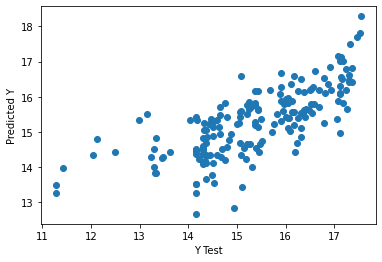

In [82]:
# Here we'll plot our predictions versus the actual values

plt.scatter(y_test, predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [83]:
from sklearn import metrics


print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.6887409114224463
MSE: 0.7745412621787007
RMSE: 0.8800802589415926
